# Predictive Analysis of Sydney House Prices: Exploring Determinants from 2000 to 2019

## Table of Contents

1. **Project Overview**
    - 1.1 Problem Statement
    - 1.2 Dataset Description
    - 1.3 Methodology

2. **Data Exploration**
    - 2.1 Import SydneyHousePrices dataset
    - 2.2 Overview of the dataset
    - 2.3 Comments on the dataset
    - 2.4 Some visualization of dataset
        - 2.4.1 Data visualization to examine the property prices
        - 2.4.2 Data visualization to examine the property details distribution
        - 2.4.3 Data visualization to examine the property location distribution
        - 2.4.4 Data visualization to examine the correlation between variables

3. **Data Preparation**
    - 3.1 Data Cleaning
        - 3.1.1 Missing Value Imputation
        - 3.1.2 Outlier Treatment
    - 3.2 Data Transformation
        - 3.2.1 Using Boxcox to transform "sellPrice"
        - 3.2.2 Encoding Categorical Variables
        - 3.2.3 Drop Irrelevant Columns
        - 3.2.4 Datetime Conversion
    - 3.3 Features Engineering
        - 3.3.1 Splitting the Dataset
        - 3.3.2 Scale the Dataset

4. **Train a Linear Model**
    - 4.1 Train a Linear Model
    - 4.2 Comments on the Performance of the Linear Regression Model

5. **Train a KNN Model**
    - 5.1 Train a Basic KNN Model
    - 5.2 Train KNN with K-Fold Cross-Validation
    - 5.3 Comments on the Performance of the KNN Model

6. **Train Decision Trees Model**
    - 6.1 Train a Basic Decision Trees Model
    - 6.2 Hyperparameter tuning with GridSearchCV for Decision Tree
    - 6.3 Comments on the Performance of the Decision Trees Model


7. **Visualize, Compare and Analyze the Results**
    - 7.1 Bar Plot of RMSE Across All Models
    - 7.2 Scatter Plots for Actual vs Predicted Values
    - 7.3 Final Conclusion
---

## **1. Project Overview**

### **1.1 Problem Statement**:

In the span of two decades, Sydney, often referred to as the Harbor City, has witnessed remarkable fluctuations in its real estate market. In this project, **my primary aim is to predict the sale prices of residential properties in Sydney from 2000 to 2019, relying on a myriad of property specifications and external factors.** An accurate price prediction model is indispensable. For potential homeowners, it elucidates the actual worth of a property and assists in informed purchasing decisions. On the flip side, for sellers and real estate agents, an adept model helps position their properties at competitive price points in the market, maximizing both interest and potential revenue.

I endeavor to **construct a comprehensive and precise prediction model using the Sydney House Prices dataset**. This model, and the methodologies applied, can pave the way for similar predictive endeavors in real estate markets worldwide.

### **1.2 Dataset Description:**

The dataset for this analytical pursuit encompasses property sale records from Sydney, spanning from 2000 to 2019. It's an extensive collection, detailing around 200,000 property sales obtained from realestate.com.au. The dataset features various attributes that can influence a property's price such as the sale date, location (suburb and postal code), property type, and key property features like the number of bedrooms, bathrooms, and car spaces.

**Link to Dataset:** [Sydney House Prices](https://www.kaggle.com/datasets/mihirhalai/sydney-house-prices/data)

### Variable Identification

- **Target Variable:**
  - `sellPrice`: Represents the selling price of the property.

- **Predictor Variables:**
  - `Date`: Date when the property was sold.
  - `suburb`: The suburb in which the property is located.
  - `postalCode`: Postal code of the property's location.
  - `bed`: Number of bedrooms in the property.
  - `bath`: Number of bathrooms in the property.
  - `car`: Number of car spaces available with the property.
  - `propType`: Type of the property, e.g., house, duplex, townhouse, etc.




### **1.3 Methodology:**

The efficacy of the predictive models will be assessed using the Root Mean Squared Error (RMSE). This metric gives a holistic measure of the prediction accuracy of the model. It computes the square root of the average squared differences between the predicted and the actual property sale prices. **A lower RMSE signifies a model that can predict property prices with higher precision, implying that the predicted prices align more closely with the observed sale prices.**

The mathematical representation for RMSE is:

$$
RMSE = \sqrt{\frac{1}{n} \sum_{i=1}^{n} (predicted_i - actual_i)^2}
$$ or $$
RMSE = \sqrt{MSE}
$$


## **2. Data Exploration:**

### **2.1 Import SydneyHousePrices dataset:**

In [1]:
import pandas as pd

# Read the dataset
df = pd.read_csv('/content/SydneyHousePrices.csv')

# Print its total length
print("Total length of the dataset:", len(df))

Total length of the dataset: 199504


### **2.2 Overview of the dataset:**

In [2]:
# Checking dataframe shape
df.shape

(199504, 9)

In [3]:
# Display the first few rows of the dataset
df.head()

,Date,Id,suburb,postalCode,sellPrice,bed,bath,car,propType
0,2019-06-19,1,Avalon Beach,2107,1210000,4.0,2,2.0,house
1,2019-06-13,2,Avalon Beach,2107,2250000,4.0,3,4.0,house
2,2019-06-07,3,Whale Beach,2107,2920000,3.0,3,2.0,house
3,2019-05-28,4,Avalon Beach,2107,1530000,3.0,1,2.0,house
4,2019-05-22,5,Whale Beach,2107,8000000,5.0,4,4.0,house


In [4]:
# Summary statistics of dataset
df.describe()

,Id,postalCode,sellPrice,bed,bath,car
count,199504.00000,199504.000000,1.995040e+05,199350.000000,199504.000000,181353.000000
mean,99752.50000,2196.379155,1.269776e+06,3.516479,1.890669,1.936224
std,57591.98839,193.053467,6.948239e+06,1.066555,0.926001,1.060237
min,1.00000,2000.000000,1.000000e+00,1.000000,1.000000,1.000000
25%,49876.75000,2082.000000,7.200000e+05,3.000000,1.000000,1.000000
50%,99752.50000,2144.000000,9.850000e+05,3.000000,2.000000,2.000000
75%,149628.25000,2211.000000,1.475000e+06,4.000000,2.000000,2.000000
max,199504.00000,4878.000000,2.147484e+09,99.000000,99.000000,41.000000


**From the summary statistics, it's observed that:**

- The average sale price is approximately $1.27 million.

- The majority of properties have 3 to 4 bedrooms and 1 to 2 bathrooms.

- There are potential outliers in the data, as evidenced by properties with 99 bedrooms/bathrooms or a sale price of just $1.

In [5]:
# Display the data types and non-null counts for each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199504 entries, 0 to 199503
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Date        199504 non-null  object 
 1   Id          199504 non-null  int64  
 2   suburb      199504 non-null  object 
 3   postalCode  199504 non-null  int64  
 4   sellPrice   199504 non-null  int64  
 5   bed         199350 non-null  float64
 6   bath        199504 non-null  int64  
 7   car         181353 non-null  float64
 8   propType    199504 non-null  object 
dtypes: float64(2), int64(4), object(3)
memory usage: 13.7+ MB


In [6]:
# Check for missing values
df.isnull().sum()

Date              0
Id                0
suburb            0
postalCode        0
sellPrice         0
bed             154
bath              0
car           18151
propType          0
dtype: int64

There are 154 missing values in the bed column and 18,151 missing values in the car column. This is something we need to address during the data preparation phase, either by imputation or by removal.

### **2.3 Comments on the dataset:**
The dataset provides a comprehensive look at property sales in Sydney over nearly two decades. However, there are areas of concern:

- Missing values in the bed and car columns need to be addressed.
- Potential outliers, especially in columns like sellPrice, bed, and bath.
- The Date column, currently an object datatype, might be more useful if converted to a datetime datatype for time series analysis.
- Given the range in sale prices, scaling might be necessary for certain machine learning models.
- In the next steps, during data preparation, it would be crucial to address these concerns to ensure the quality and reliability of our analysis and predictive models.

### **2.4 Some visualization of dataset:**

#### **2.4.1 Data visualization to examine the property prices**

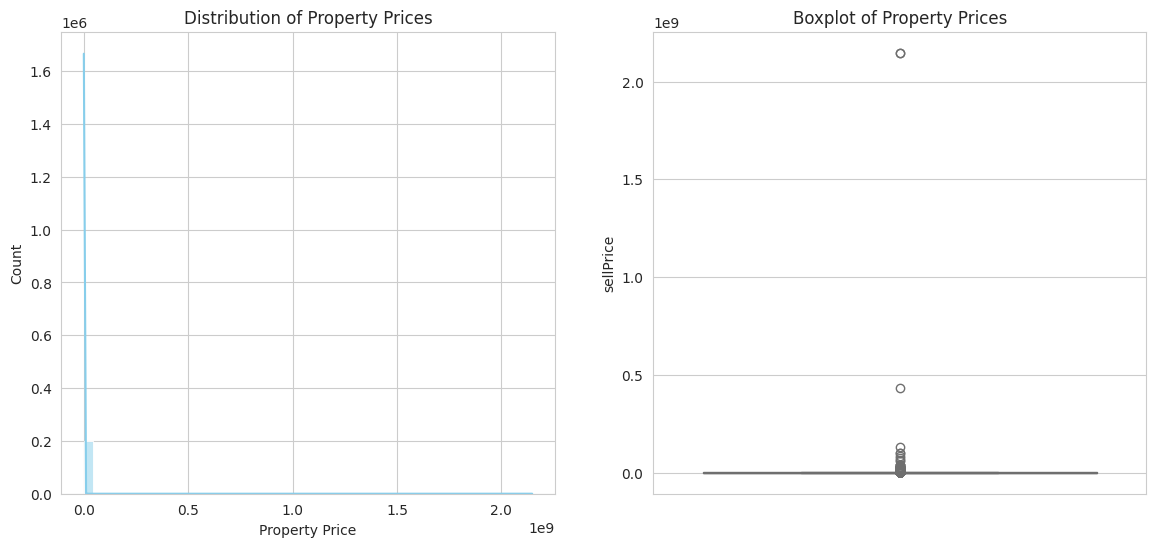

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting the style and size
sns.set_style('whitegrid')
plt.figure(figsize=(14, 6))

# Histogram to visualize the distribution
plt.subplot(1, 2, 1)
sns.histplot(df['sellPrice'], kde=True, color="skyblue", bins=50)
plt.title('Distribution of Property Prices')
plt.xlabel('Property Price')
plt.ylabel('Count')

# Boxplot to check for outliers and get statistical view
plt.subplot(1, 2, 2)
sns.boxplot(y=df['sellPrice'], color="skyblue")
plt.title('Boxplot of Property Prices')
plt.show()

The visual representation of property prices seems challenging to decipher. Delving into the descriptive statistics of the sellPrice column might shed light on the nuances of its distribution. Let's unpack the data to better understand the intricacies of property pricing.

In [8]:
# Descriptive statistics for the sellPrice column
describe_price = df['sellPrice'].describe()

# Print the statistics
print("Property Price Statistics:\n")
print("Mean Price: $", round(describe_price['mean'], 2))
print("Median Price: $", round(describe_price['50%'], 2))
print("Standard Deviation: $", round(describe_price['std'], 2))
print("Lowest Price (min): $", describe_price['min'])
print("Highest Price (max): $", describe_price['max'])
print("\nInterquartile Range (IQR):")
print("25th Percentile (Q1): $", describe_price['25%'])
print("75th Percentile (Q3): $", describe_price['75%'])

# Determine outliers using the IQR method
IQR = describe_price['75%'] - describe_price['25%']
lower_bound = describe_price['25%'] - (1.5 * IQR)
upper_bound = describe_price['75%'] + (1.5 * IQR)

print("\nOutliers Boundaries:")
print("Price below $", lower_bound, "and above $", upper_bound, "can be considered as outliers.")

# Count outliers
outliers = df[(df['sellPrice'] < lower_bound) | (df['sellPrice'] > upper_bound)]
print("\nNumber of Outliers:", outliers.shape[0])

Property Price Statistics:

Mean Price: $ 1269776.3
Median Price: $ 985000.0
Standard Deviation: $ 6948239.27
Lowest Price (min): $ 1.0
Highest Price (max): $ 2147483647.0

Interquartile Range (IQR):
25th Percentile (Q1): $ 720000.0
75th Percentile (Q3): $ 1475000.0

Outliers Boundaries:
Price below $ -412500.0 and above $ 2607500.0 can be considered as outliers.

Number of Outliers: 11558


### Property Price Analysis

The dataset presents some interesting insights regarding property prices:

- **Average vs. Median:** The average property price is approximately `$1,269,776`, which is notably higher than the median price of `$985,000`. This discrepancy suggests the presence of some substantially high-valued properties elevating the mean. Such a divergence between the mean and median is indicative of a skewed distribution. In this context, the data appears to be right-skewed, likely influenced by high-end luxury properties.

- **Data Range:** The property prices stretch across a vast range, from a minimum of just `$1.0` (which might be indicative of missing or incorrect data) to a staggering maximum of approximately `$2.15` billion. Such an exorbitantly high maximum price, when combined with a high standard deviation of `$6,948,239.27`, raises suspicions of outliers or potential data entry errors.

- **Interquartile Range (IQR):** The IQR, representing the spread of the middle 50% of prices, reveals that half of the properties lie between `$720,000` and `$1,475,000`. Using the IQR method, properties priced below `-$412,500` or above `$2,607,500` qualify as outliers. Notably, this dataset contains `11,558` such outlier properties.

Given these insights, it becomes imperative to meticulously examine the extreme values, especially the ones at the fringes, ensuring they aren't anomalies that might skew subsequent analyses.



#### **2.4.2 Data visualization to examine the property details distribution**

<ipython-input-9-331e46b83c4b>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='bed', ax=axes[0, 0], palette='viridis')
<ipython-input-9-331e46b83c4b>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='bath', ax=axes[0, 1], palette='viridis')
<ipython-input-9-331e46b83c4b>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='car', ax=axes[1, 0], palette='viridis')
<ipython-input-9-331e46b83c4b>:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. A

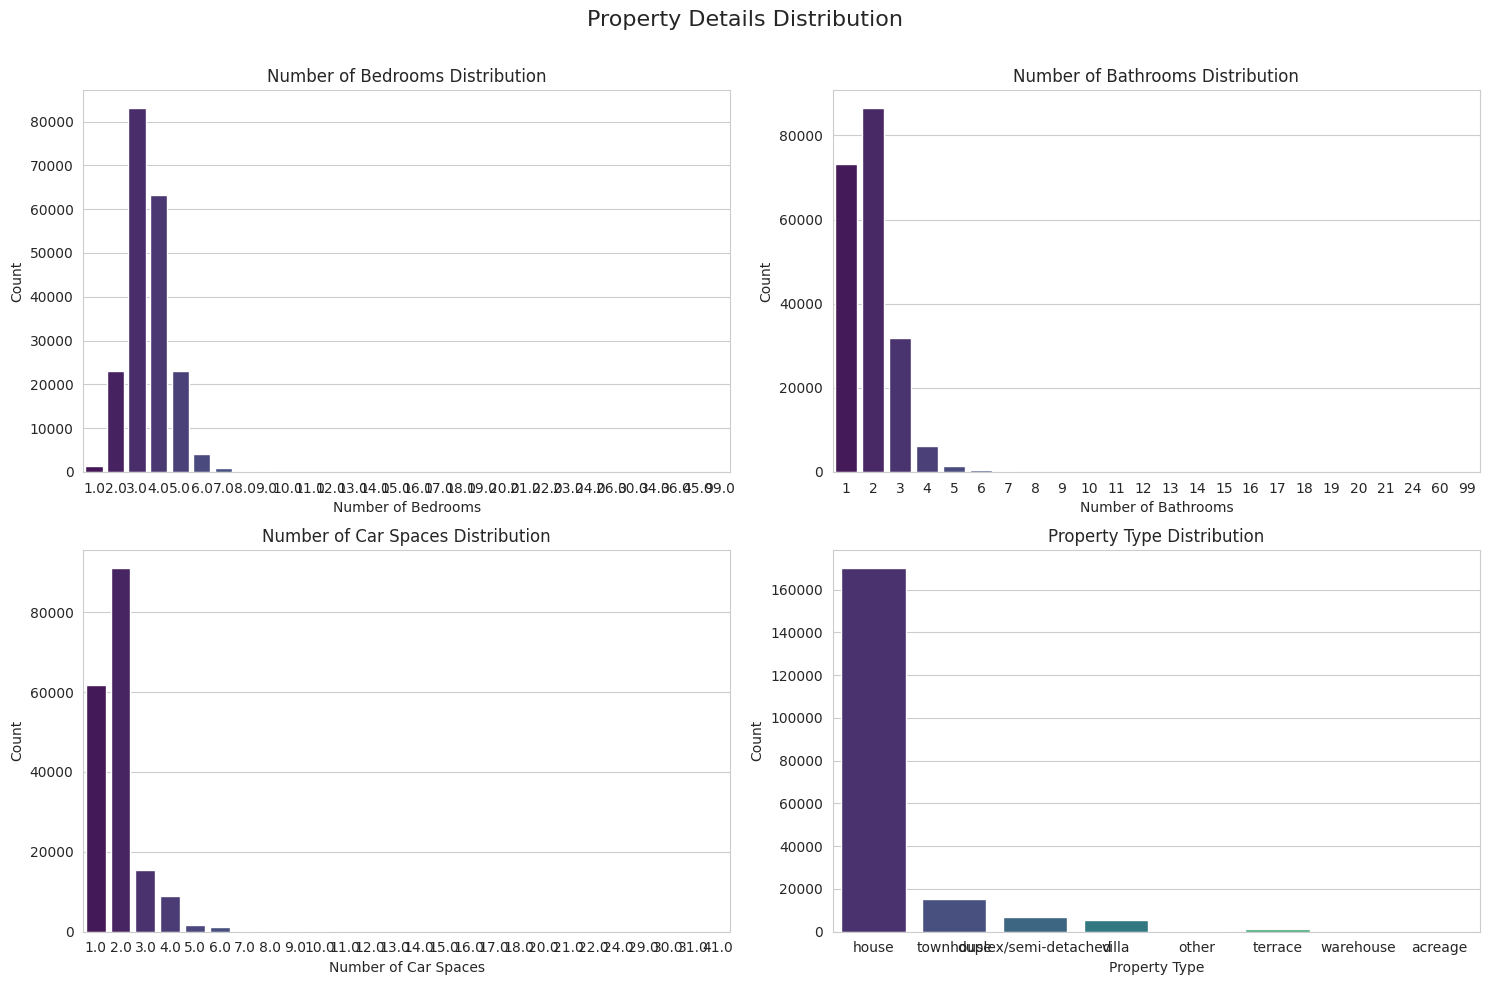

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetics
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

# Set up the subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
fig.suptitle('Property Details Distribution', fontsize=16)

# Plotting for Number of Bedrooms
sns.countplot(data=df, x='bed', ax=axes[0, 0], palette='viridis')
axes[0, 0].set_title('Number of Bedrooms Distribution')
axes[0, 0].set_xlabel('Number of Bedrooms')
axes[0, 0].set_ylabel('Count')

# Plotting for Number of Bathrooms
sns.countplot(data=df, x='bath', ax=axes[0, 1], palette='viridis')
axes[0, 1].set_title('Number of Bathrooms Distribution')
axes[0, 1].set_xlabel('Number of Bathrooms')
axes[0, 1].set_ylabel('Count')

# Plotting for Number of Car Spaces
sns.countplot(data=df, x='car', ax=axes[1, 0], palette='viridis')
axes[1, 0].set_title('Number of Car Spaces Distribution')
axes[1, 0].set_xlabel('Number of Car Spaces')
axes[1, 0].set_ylabel('Count')

# Plotting for Property Type
sns.countplot(data=df, x='propType', ax=axes[1, 1], palette='viridis')
axes[1, 1].set_title('Property Type Distribution')
axes[1, 1].set_xlabel('Property Type')
axes[1, 1].set_ylabel('Count')

# Adjust layout
plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()

---
#### **Comment on property details distribution:**

##### **Number of Bedrooms Distribution:**

- Most properties in the dataset fall within the 3 to 4-bedroom range, suggesting a market that caters primarily to families or multiple occupants.
- There's also a noticeable presence of 2-bedroom and 5-bedroom homes, offering variety for smaller families or those seeking extra space.
- Homes with an exceedingly high number of bedrooms are rare, indicating either niche luxury offerings or potential data inconsistencies that warrant further scrutiny.

##### **Number of Bathrooms Distribution:**

- A significant proportion of properties feature 1 to 2 bathrooms, aligning with the trend observed in the bedroom distribution.
- While there's a substantial drop in frequency as we move from 3 to 4 bathrooms, it’s clear that most homes aim to strike a balance between comfort and practicality.
- Extreme bathroom counts, especially at the higher end, are uncommon and might signify either specialized properties or data anomalies.

##### **Number of Car Spaces Distribution:**

- The dataset showcases a dominance of properties with 1 to 2 car spaces, indicating a standard that fits the needs of most urban families.
- Homes with more extensive parking facilities are less frequent, suggesting they're either premium offerings or located in areas with ample space.
- Very high car space numbers are unusual and should be examined for data accuracy.

##### **Property Type Distribution:**

- Traditional houses dominate the property type distribution by a wide margin, solidifying their status as the preferred choice for many.
- Other property types, such as townhouses and duplexes, offer alternatives for those seeking different living experiences, though they are considerably less common.
- Rare property types, like warehouses or acreages, reflect the diversity of the Sydney market, though they cater to a much smaller segment of buyers or investors.

#### **2.4.3 Data visualization to examine the property location distribution**

<ipython-input-10-f2343ee07717>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_suburbs.index, x=top_suburbs.values, palette='viridis', orient='h')


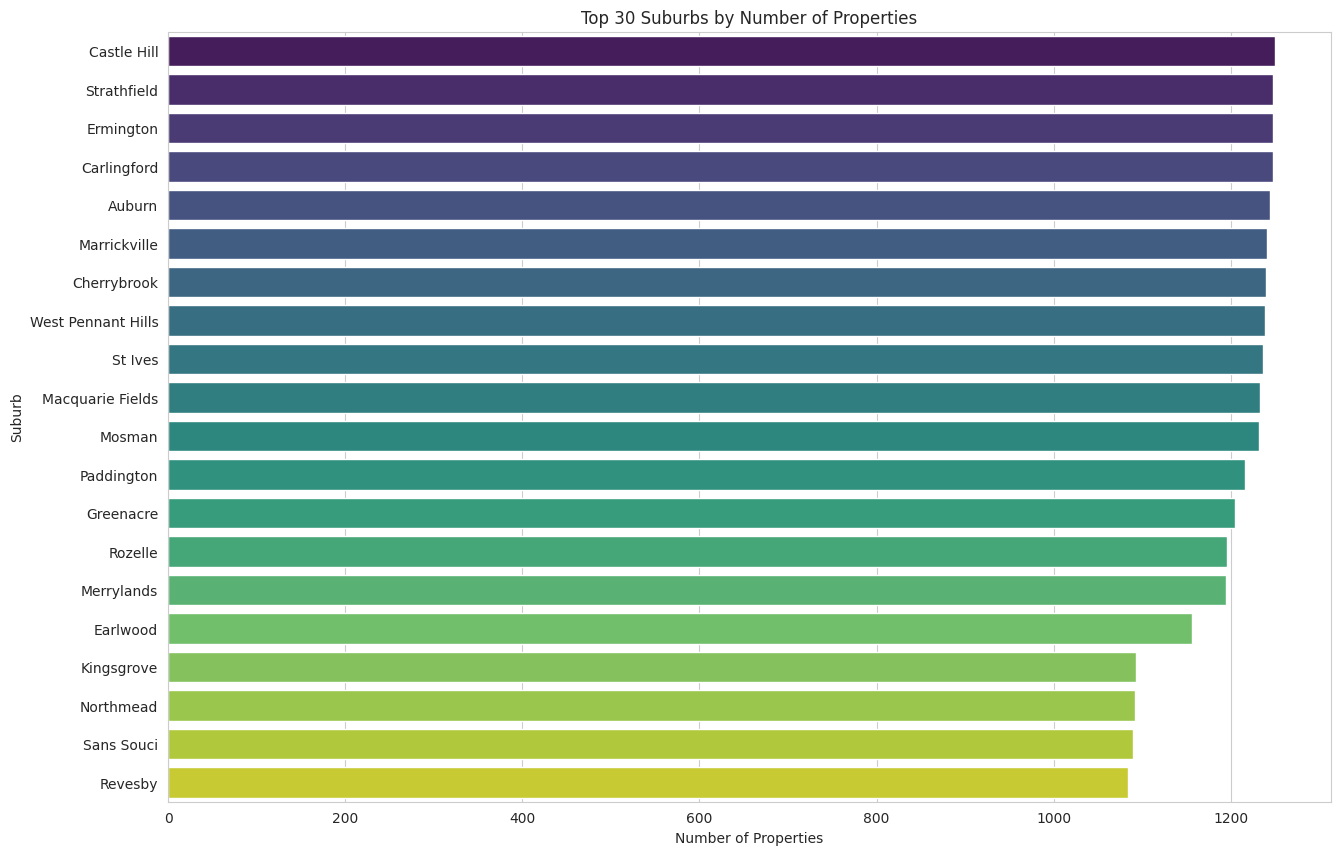

In [10]:
# Visualizing top 20 suburbs based on their frequency
top_suburbs = df['suburb'].value_counts().head(20)
plt.figure(figsize=(15,10))
sns.barplot(y=top_suburbs.index, x=top_suburbs.values, palette='viridis', orient='h')
plt.title('Top 30 Suburbs by Number of Properties')
plt.xlabel('Number of Properties')
plt.ylabel('Suburb')
plt.show()

---
#### **Comments on Property Location Distribution:**

The data presents the top 20 suburbs based on the number of properties. A few key insights from this distribution are:

1. **Close Competition:** The differences in property counts among the top suburbs are relatively small. The difference between the suburb with the highest number of properties, Castle Hill, and the 20th, Revesby, is only 166 properties. This suggests that these areas are comparably popular or dense in terms of property listings.

2. **Prominent Suburbs:** Suburbs like Castle Hill, Strathfield, and Ermington lead the list with the highest numbers. They might be areas of higher residential density or perhaps areas where there's been a recent boom in property listings.

3. **Consistency:** Many of the suburbs, especially the ones in the top 10, have property counts in the 1200s range. This shows a consistent level of property distribution across these suburbs.

4. **Diverse Range:** The diversity in the top suburbs, from Castle Hill to Revesby, indicates that property listings are spread across various areas, potentially representing different socio-economic zones, amenities, and types of housing.

5. **Further Exploration:** While this list gives a clear view of where the majority of properties are concentrated, for a deeper understanding, one might consider factors like proximity to the city center, amenities, schools, and public transport availability in these areas. It would be essential to see if there's a specific reason, such as infrastructural development or economic factors, contributing to the high number of listings in these suburbs.

#### **2.4.4 Data visualization to examine the correlation between variables**

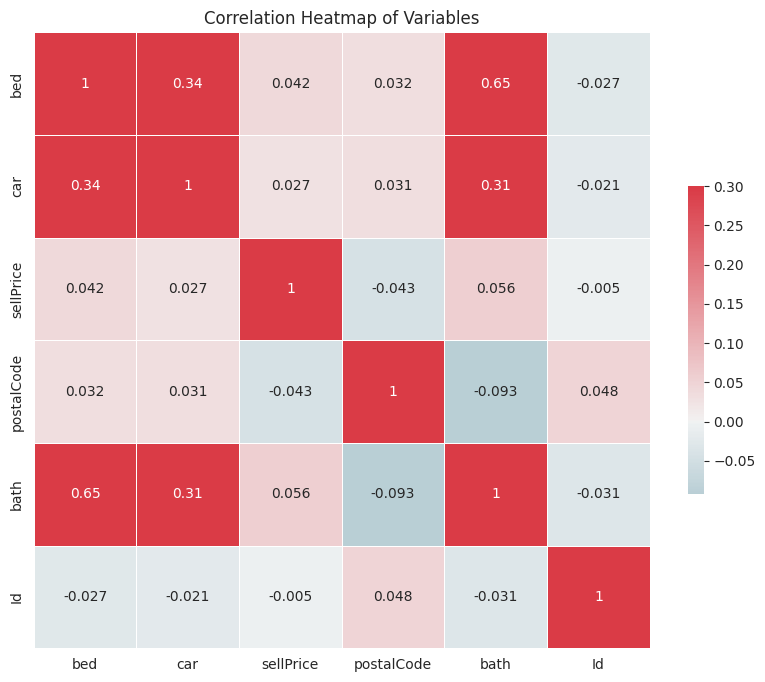

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
corr = df[["bed", "car", "sellPrice", "postalCode", "bath", "Id"]].corr()


# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

plt.title("Correlation Heatmap of Variables")
plt.show()

---
#### **Analysis on Correlations between Variables:**

- **`Id` vs. Other Variables:** The `Id` of the property doesn't show significant correlations with other variables. This is expected, as the `Id` is likely just an identifier and should not have any systematic relationship with property characteristics.

- **`postalCode` vs. `sellPrice`:** There is a slight negative correlation (-0.042752) between `postalCode` and `sellPrice`, suggesting that as postal code numbers increase, the selling price might slightly decrease. However, this correlation is weak, so we can't draw significant conclusions solely based on this. Furthermore, the direction of postal code numbering might not necessarily relate to property value directly (e.g., urban vs. rural areas).

- **Bedrooms, Bathrooms, and Car Spaces:**
  - The number of bedrooms (`bed`) and bathrooms (`bath`) in a property shows a strong positive correlation of 0.652988. This suggests that properties with more bedrooms also tend to have more bathrooms.
  - Both the number of bedrooms and bathrooms show a positive correlation with `sellPrice`, with values of 0.041992 for bedrooms and 0.056381 for bathrooms. This indicates that, on average, properties with more bedrooms and bathrooms tend to be priced higher. Specifically, the correlation with bathrooms is slightly stronger, hinting that the number of bathrooms might have a slightly more pronounced effect on property price than the number of bedrooms.
  - The number of car spaces (`car`) has positive correlations with both the number of bedrooms and bathrooms, with values of 0.339489 and 0.313970, respectively. This suggests that larger properties, in terms of bedrooms and bathrooms, also tend to offer more parking spaces.
  - The correlation between car spaces and selling price is positive at 0.026902. Although it's a weak correlation, it implies that properties with more parking spaces might have a slightly higher selling price.

- **Overall Impact on `sellPrice`:** While bedrooms, bathrooms, and car spaces do correlate with the selling price, the correlations are relatively weak. This suggests that while these factors contribute to property pricing, there are likely other external variables not captured in this dataset (like property location specifics, property age, amenities, etc.) that play a significant role in determining property prices.

## **3. Data Preparation:**

### **3.1 Data Cleaning:**

#### **3.1.1 Missing Value Imputation:**

In [12]:
# Imputing missing values for 'bed' column with its median value
df['bed'].fillna(df['bed'].median(), inplace=True)

# Imputing missing values for 'car' column with its median value
df['car'].fillna(df['car'].median(), inplace=True)

# Verifying that all missing values are handled
print(df.isnull().sum())

Date          0
Id            0
suburb        0
postalCode    0
sellPrice     0
bed           0
bath          0
car           0
propType      0
dtype: int64


#### **3.1.2 Outlier Treatment:**

**a. Number of Bedrooms (bed):**
Considering most properties have 3-4 bedrooms, a property with 99 bedrooms seems unusual. We might decide to cap this at a more reasonable upper threshold, like 10.

**b. Number of Bathrooms (bath):**
With most properties having 1-2 bathrooms, a maximum of 99 seems improbable. Capping this at an upper threshold like 10 would be a reasonable choice.

**c. Car Spaces (car):**
With most properties having 1-2 car spaces, an upper cap like 10 would again be a plausible choice, especially considering the max is 41.

**d. Sell Price (sellPrice):**
The sell price has an extreme maximum value which can significantly affect the analysis. We should investigate very high property prices and decide if they are valid data points or potential errors.

**Outlier Treatment Strategy:**

In [13]:
# For the 'bed' column, cap values at 10
df['bed'] = df['bed'].apply(lambda x: x if x <= 10 else 10)

# For the 'bath' column, cap values at 10
df['bath'] = df['bath'].apply(lambda x: x if x <= 10 else 10)

# For the 'car' column, cap values at 10
df['car'] = df['car'].apply(lambda x: x if x <= 10 else 10)

**Checking "Outlier Treatment":**

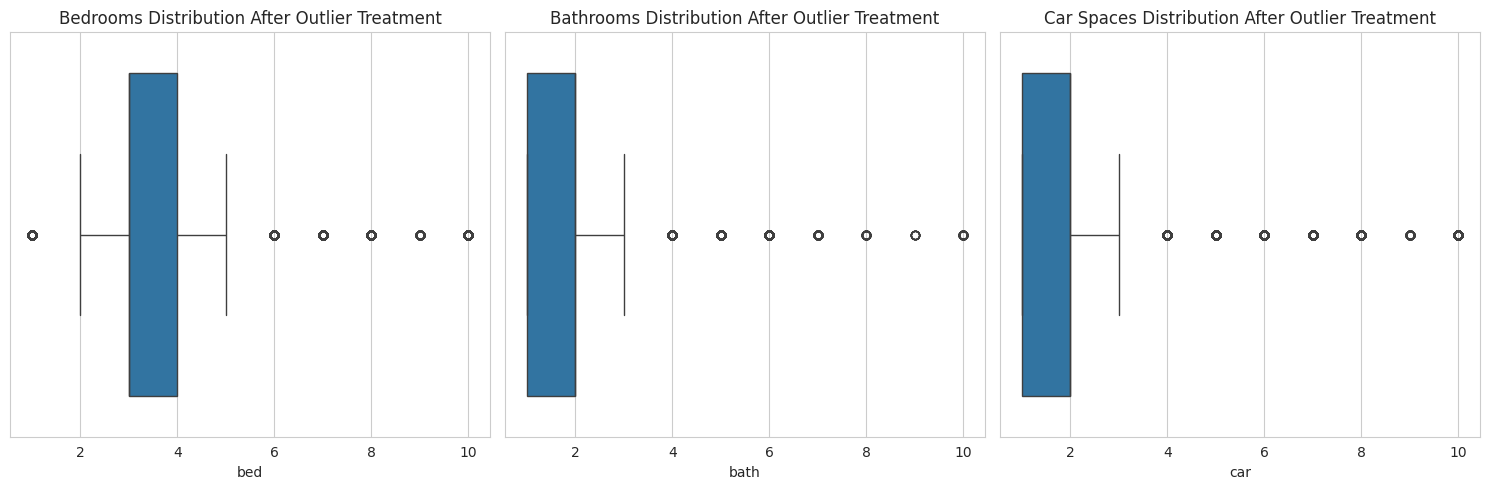

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualizing the Distribution After Outlier Treatment

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15,5))

# Plotting the 'bed' column distribution after outlier treatment
plt.subplot(1,3,1)
sns.boxplot(x=df['bed'])
plt.title('Bedrooms Distribution After Outlier Treatment')

# Plotting the 'bath' column distribution after outlier treatment
plt.subplot(1,3,2)
sns.boxplot(x=df['bath'])
plt.title('Bathrooms Distribution After Outlier Treatment')

# Plotting the 'car' column distribution after outlier treatment
plt.subplot(1,3,3)
sns.boxplot(x=df['car'])
plt.title('Car Spaces Distribution After Outlier Treatment')

plt.tight_layout()
plt.show()

**We can confidently state that our outlier treatment was successfully applied, as all maximum values are capped at 10 as intended.**

### **3.2 Data Transformation:**

#### **3.2.1 Using Boxcox to transform "sellPrice":**

For variables that have a right-skewed distribution, such as sellPrice, we can apply transformations to make the distribution more normal:

In [15]:
from scipy.stats import boxcox

# Apply Box-Cox transformation
df['sellPrice'], lam = boxcox(df['sellPrice'])

**Reviewing the Data Transformation:**

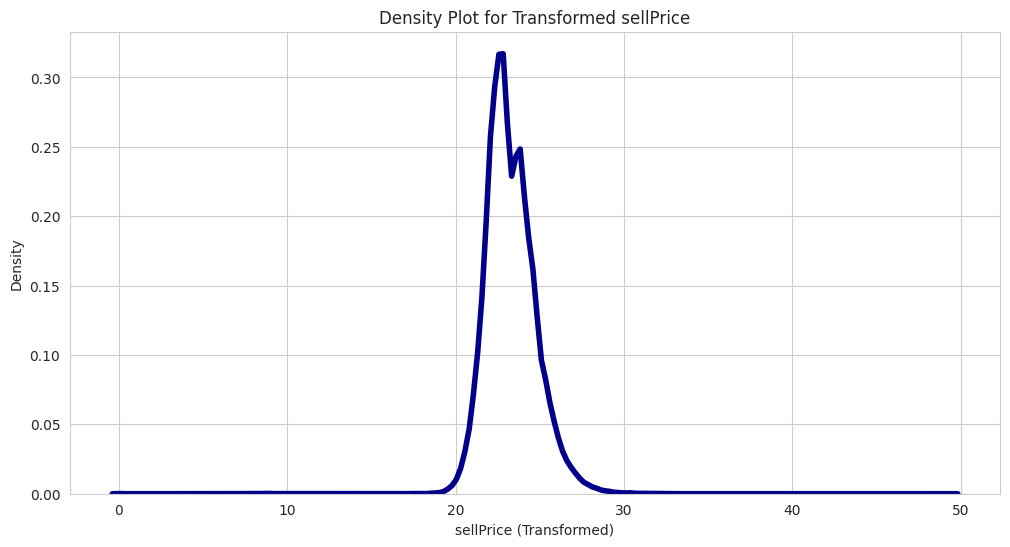

Transformed Skewness: 0.1408737713900507
Lambda Value: 0.06913703618093987


In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew

# Displaying the transformed distribution
plt.figure(figsize=(12, 6))
sns.kdeplot(df['sellPrice'], color='darkblue', linewidth=4)
plt.title('Density Plot for Transformed sellPrice')
plt.xlabel('sellPrice (Transformed)')
plt.ylabel('Density')
plt.show()

# Assess Skewness
new_skewness = skew(df['sellPrice'])
print(f"Transformed Skewness: {new_skewness}")

# Report Lambda Value
print(f"Lambda Value: {lam}")

---
**Boxcox Transformation Performance Analysis:**

- **Transformed Skewness:**
The skewness of the transformed data is \(0.1409\). This value, being closer to zero compared to the initial skewness, suggests that the transformed distribution is more symmetrical and demonstrates considerably less skewness than before applying the transformation.

- **Lambda Value:**
The lambda value determined by the Boxcox transformation is \(0.0691\). For context:
  - A lambda value of \(0\) would imply that a pure logarithmic transformation has been applied.
  - A lambda value of \(0.5\) would be akin to a square root transformation.
  
  The obtained lambda leans towards \(0\), suggesting the transformation is similar to, but not exactly, a logarithmic transformation. Instead, it's an optimized transformation specifically tailored for the `sellPrice` distribution.

**Interpretation:**
The Box-Cox transformation effectively regularized the sellPrice distribution. We've significantly reduced skewness, resulting in a more symmetric distribution. This transformation is anticipated to enhance the performance in subsequent modeling efforts.

#### **3.2.2 Encoding Categorical Variables:**

In [17]:
from sklearn.preprocessing import OrdinalEncoder

# Initialize the ordinal encoder
encoder = OrdinalEncoder()

# Define the columns you want to encode
columns_to_encode = ['suburb', 'propType']

# Fit and transform the selected columns
df[columns_to_encode] = encoder.fit_transform(df[columns_to_encode])

# Display the first few rows of the dataframe to see the encoded columns
print(df.head())

         Date  Id  suburb  postalCode  sellPrice  bed  bath  car  propType
0  2019-06-19   1    22.0        2107  23.628079  4.0     2  2.0       2.0
1  2019-06-13   2    22.0        2107  25.297249  4.0     3  4.0       2.0
2  2019-06-07   3   654.0        2107  26.020274  3.0     3  2.0       2.0
3  2019-05-28   4    22.0        2107  24.251081  3.0     1  2.0       2.0
4  2019-05-22   5   654.0        2107  28.941838  5.0     4  4.0       2.0


#### **3.2.3 Drop Irrelevant Columns:**

Based on the correlation (heatmap), ID seem not affect the houses price, so it should be removed.  

In [18]:
# Dropping the 'Id' and 'Date' columns as they might not be relevant for the modeling process
df.drop(columns=['Id'], inplace=True)

# Displaying the first few rows of the dataframe to verify the columns have been dropped
df.head()

,Date,suburb,postalCode,sellPrice,bed,bath,car,propType
0,2019-06-19,22.0,2107,23.628079,4.0,2,2.0,2.0
1,2019-06-13,22.0,2107,25.297249,4.0,3,4.0,2.0
2,2019-06-07,654.0,2107,26.020274,3.0,3,2.0,2.0
3,2019-05-28,22.0,2107,24.251081,3.0,1,2.0,2.0
4,2019-05-22,654.0,2107,28.941838,5.0,4,4.0,2.0


#### **3.2.4 Datetime Conversion:**

In [19]:
import pandas as pd

# Convert 'Date' column to datetime datatype
df['Date'] = pd.to_datetime(df['Date'])

# Check the datatypes of the DataFrame to confirm
print(df.dtypes)

Date          datetime64[ns]
suburb               float64
postalCode             int64
sellPrice            float64
bed                  float64
bath                   int64
car                  float64
propType             float64
dtype: object


**Checking if the year in 'Date' affect the sellPrice**

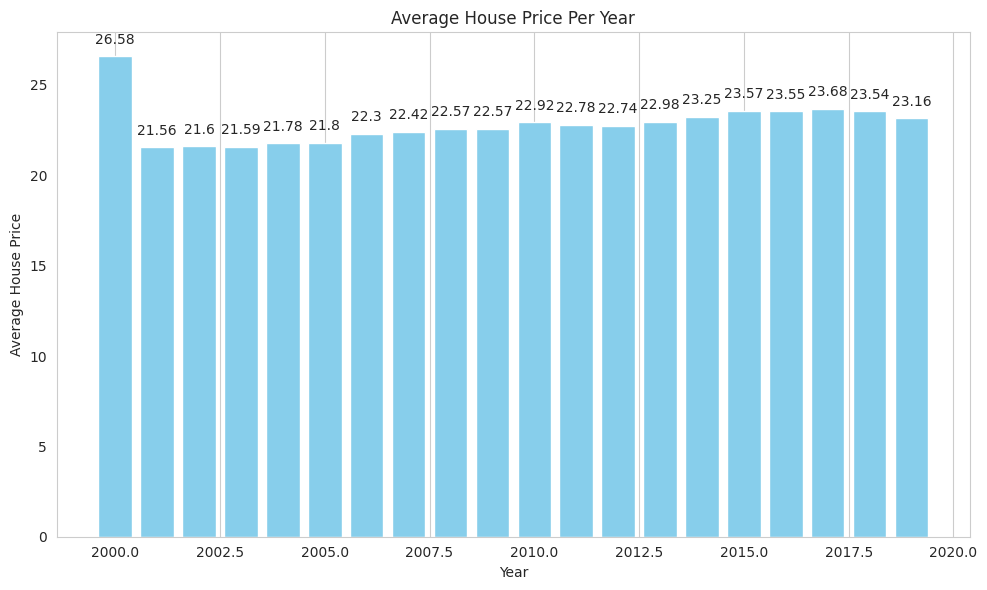

In [20]:
import matplotlib.pyplot as plt

#Extracted the 'Year' from the 'Date' column:
df['Year'] = df['Date'].dt.year

# Group by Year and calculate the mean sellPrice
average_price_per_year = df.groupby('Year')['sellPrice'].mean()

# Plotting
plt.figure(figsize=(10, 6))
bars = plt.bar(average_price_per_year.index, average_price_per_year.values, color='skyblue')

# Displaying the number above each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.02*max(average_price_per_year.values), round(yval, 2),
             ha='center', va='bottom', fontsize=10)  # Adjust 0.02 for desired label position

plt.title('Average House Price Per Year')
plt.xlabel('Year')
plt.ylabel('Average House Price')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

**After examining the data, it seems that the exact date of sale (i.e., day and month) doesn't provide significant information in predicting the sell price. However, the year of sale does show a clear trend. So, let's drop the Date column and retain the Year column that we've already created.**

In [21]:
# Drop the 'Date' column
df.drop(columns=['Date'], inplace=True)

### **3.3 Features Engineering:**

#### **3.3.1 Splitting the Dataset:**

In [22]:
from sklearn.model_selection import train_test_split

# Splitting the dataset into 80% training and 20% testing
X = df.drop(columns='sellPrice')
y = df['sellPrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state= 42)

#### **3.3.2 Scale the Dataset:**

In [23]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## **4. Train a Linear Model:**

### **4.1 Train a Linear Model:**

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np


# Initialize the linear regression model
lr = LinearRegression()

# Train the model
lr.fit(X_train, y_train)

# Predictions on the test set
y_pred = lr.predict(X_test)

# Evaluate the performance using Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error of the Linear Model: {mse}")

# Evaluate the performance using Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE) of the Linear Model: {rmse}")

Mean Squared Error of the Linear Model: 1.1858287119587028
Root Mean Squared Error (RMSE) of the Linear Model: 1.0889576263375462


### **4.2 Comments on the Performance of the Linear Regression Model:**

1. **Error Scale:** The RMSE is 1.09. Its significance depends on the scale of `sellPrice`. If `sellPrice` ranges in hundreds or thousands, an RMSE of 1.09 is commendable; if it's between 1 and 10, this error might be considerable.

2. **Model Simplicity:** Linear regression is a basic and interpretable model but may struggle with complex, nonlinear relationships.

3. **Feature Choices:** Our data preprocessing, such as the Box-Cox transformation and encoding methods, has a notable effect on the performance. We might need to re-evaluate encoding techniques or address extreme `sellPrice` values.

4. **Improvement Avenues:** Potential enhancements include adding interaction terms, trying alternative encoding methods, or further scrutinizing outliers in the target variable.

5. **Data Methodology:** Using k-fold cross-validation might offer a more consistent performance evaluation.

6. **Comparison:** Comparing our model's RMSE to a simple benchmark, like predicting the average `sellPrice`, can provide perspective.

7. **Residual Analysis:** Investigating the residuals can reveal if our model is overlooking certain patterns in the data.

In summary, while our model offers a decent foundation considering our preprocessing actions, there are avenues for further refinement and enhancement.



## **5. Train a KNN Model:**

### **5.1 Train a Basic KNN Model:**

In [25]:
from sklearn.neighbors import KNeighborsRegressor

# Initialize the KNN regressor
knn = KNeighborsRegressor(n_neighbors=5)

# Train the model
knn.fit(X_train_scaled, y_train)

# Predictions
y_pred_knn = knn.predict(X_test_scaled)

# Evaluate performance
mse_knn = mean_squared_error(y_test, y_pred_knn)
print(f"Mean Squared Error of the KNN Model: {mse_knn}")
print(f"Root Mean Squared Error (RMSE) of the KNN Model: {np.sqrt(mse_knn)}")

Mean Squared Error of the KNN Model: 0.7933838786760552
Root Mean Squared Error (RMSE) of the KNN Model: 0.8907209881192063


### **5.2 Train KNN with K-Fold Cross-Validation:**

In [26]:
from sklearn.model_selection import cross_val_score

# Initialize the KNN regressor
knn_cv = KNeighborsRegressor(n_neighbors=5)

# Perform 10-fold cross validation
cv_scores = cross_val_score(knn_cv, X_train_scaled, y_train, cv=10, scoring='neg_mean_squared_error')

# Negative because scikit-learn's convention is to maximize the score, so losses (like MSE) are shown as negatives.
print(f"Mean MSE with 10-Fold CV: {-cv_scores.mean()}")
print(f"Root Mean Squared Error (RMSE) with 10-Fold CV: {np.sqrt(-cv_scores.mean())}")

Mean MSE with 10-Fold CV: 0.7820328545914533
Root Mean Squared Error (RMSE) with 10-Fold CV: 0.8843262150312255


### **5.3 Comments on the Performance of the KNN Model:**

1. **Comparison with Linear Regression:**
    - The KNN model appears to perform better than the linear regression model we trained previously. The RMSE is 0.891 for the KNN versus 1.089 for the linear regression. This suggests that KNN is capturing certain patterns or relationships in the data that the linear regression might be missing.

2. **Effect of Scaling:**
    - KNN is sensitive to the scale of features, hence scaling is essential. We used scaled versions of the training and test sets (`X_train_scaled` and `X_test_scaled`) for the KNN, which likely improved its performance.

3. **K-Fold Cross-Validation Performance:**
    - The RMSE from the 10-Fold CV (0.884) is very close to the RMSE without cross-validation (0.891). This closeness indicates that our model is consistent and doesn't suffer from significant variance when exposed to different subsets of the training data.

4. **Choice of K (n_neighbors):**
    - We've selected `k=5`, which might or might not be optimal. Hyperparameter tuning, using techniques like grid search, could potentially optimize this choice and further improve the model's performance.

5. **Local vs. Global Model:**
    - While linear regression attempts to find a global relationship in the data, KNN works on local approximations. The success of KNN here suggests that there might be more local patterns in the data that are harder for linear models to capture.

6. **Benefits of KNN:**
    - KNN can capture nonlinearities in the dataset without needing any explicit transformation. Its performance here suggests that the dataset might have some non-linear relationships.

7. **Limitations of KNN:**
    - While KNN has performed well, it has some downsides. It can be computationally intensive, especially with large datasets. Also, it doesn't provide coefficients or insights into feature importance, like linear regression.

8. **Potential Improvements:**
    - Considering weighted KNN (where closer neighbors have a bigger influence) or adjusting the distance metric might result in performance enhancements.

9. **Final Takeaway:**
    - Given its performance and the stability shown in the 10-fold CV, KNN appears to be a promising model for this dataset. However, a more comprehensive hyperparameter search and possible ensemble methods might push the performance even further.

In summary, the KNN model showcases strong predictive capabilities for this dataset, outpacing the linear regression in terms of RMSE. With its ability to intuitively capture local patterns without explicit feature engineering, it underscores the potential value of instance-based learning in certain scenarios. However, we should remain mindful of its computational demands and the lack of interpretability relative to models like linear regression.



## **6. Train Decision Trees Model:**

### **6.1 Train a Basic Decision Trees Model:**

In [27]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# Initialize the Decision Tree regressor with a random state
dtree = DecisionTreeRegressor(random_state=42)

# Train the model
dtree.fit(X_train_scaled, y_train)

# Predictions
y_pred_dtree = dtree.predict(X_test_scaled)

# Evaluate performance
mse_dtree = mean_squared_error(y_test, y_pred_dtree)
print(f"Mean Squared Error of the Decision Tree Model: {mse_dtree}")
print(f"Root Mean Squared Error (RMSE) of the Decision Tree Model: {np.sqrt(mse_dtree)}")

Mean Squared Error of the Decision Tree Model: 0.7775199149968952
Root Mean Squared Error (RMSE) of the Decision Tree Model: 0.8817708971138111


## **6.2 Hyperparameter tuning with GridSearchCV for Decision Tree:**

In [28]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

# Set up hyperparameter grid for tuning
param_grid = {
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize tree regressor with a random state
tree = DecisionTreeRegressor(random_state=42)

# Grid search
grid_search = GridSearchCV(tree, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_scaled, y_train)

# Use the best estimator
best_tree = grid_search.best_estimator_

# Predictions
y_pred_best_tree = best_tree.predict(X_test_scaled)

# Evaluate performance
mse_best_tree = mean_squared_error(y_test, y_pred_best_tree)
print(f"Mean Squared Error of the Best Decision Tree Model: {mse_best_tree}")
print(f"Root Mean Squared Error (RMSE) of the Best Decision Tree Model: {np.sqrt(mse_best_tree)}")

Mean Squared Error of the Best Decision Tree Model: 0.5772865311672659
Root Mean Squared Error (RMSE) of the Best Decision Tree Model: 0.759793742516524


### **6.3 Comments on the Performance of the Decision Trees Model:**

1. **Comparison to Previous Models:**
    - The basic Decision Tree model achieved an RMSE of 0.882, which is close to the KNN model's performance (0.891). However, after hyperparameter tuning, the RMSE improved significantly to 0.760. This improvement emphasizes the importance of hyperparameter tuning and showcases that a well-tuned Decision Tree model can outperform both the KNN and the Linear Regression models.

2. **Effects of Scaling:**
    - It's important to note that Decision Trees, in contrast to KNN, aren't sensitive to the scale of features. Although we've used the scaled dataset (`X_train_scaled` and `X_test_scaled`) for consistency, the Decision Tree would likely have produced similar results even with the unscaled data.

3. **Interpretability Advantage:**
    - Decision Trees offer a distinct advantage over KNN in terms of interpretability. They provide a clear view of feature importance and decision pathways, which can be valuable for understanding and explaining the model's predictions.

4. **Overfitting Concerns:**
    - Decision Trees are notorious for overfitting, especially when they are allowed to grow deep. The significant improvement achieved after hyperparameter tuning may hint that the basic model was overfitting the training data. The hyperparameter tuning likely pruned the tree and prevented overfitting, leading to better generalization on the test data.

5. **GridSearchCV Insights:**
    - The `GridSearchCV` method systematically searches through a predefined hyperparameter space to find the optimal values. The noticeable improvement in RMSE after using the best estimator from `GridSearchCV` highlights the importance of hyperparameter selection.

6. **Hyperparameters' Role:**
    - The choice of `max_depth`, `min_samples_split`, and `min_samples_leaf` can heavily influence the model's performance.
        * `max_depth` restricts the depth of the tree and can help in avoiding overfitting.
        * `min_samples_split` and `min_samples_leaf` define the minimum number of samples required to make further splits or be a leaf node. These parameters, when set appropriately, ensure that the tree doesn't make decisions based on very few samples, again avoiding overfitting.

7. **Potential for Ensemble Methods:**
    - Given the performance of a single Decision Tree, there's potential for further improvement by considering ensemble methods like Random Forest or Gradient Boosting Trees. These methods tend to reduce variance and can often achieve better performance by leveraging multiple decision trees.

8. **Final Takeaway:**
    - Decision Trees have demonstrated a strong ability to fit the dataset, especially after hyperparameter tuning. The model offers a balance between performance and interpretability. As with any model, care should be taken to regularly evaluate its performance against new data and be wary of potential overfitting.

In summary, the Decision Tree model, especially when fine-tuned, exhibits competitive predictive capabilities. It strikes a balance between performance and clarity, making it a valuable tool for both predictions and insights. Regular evaluations and potential integration with ensemble methods could further enhance its effectiveness.

## **7. Visualize, Compare and Analyze the Results:**

### **7.1. Bar Plot of RMSE Across All Models:**

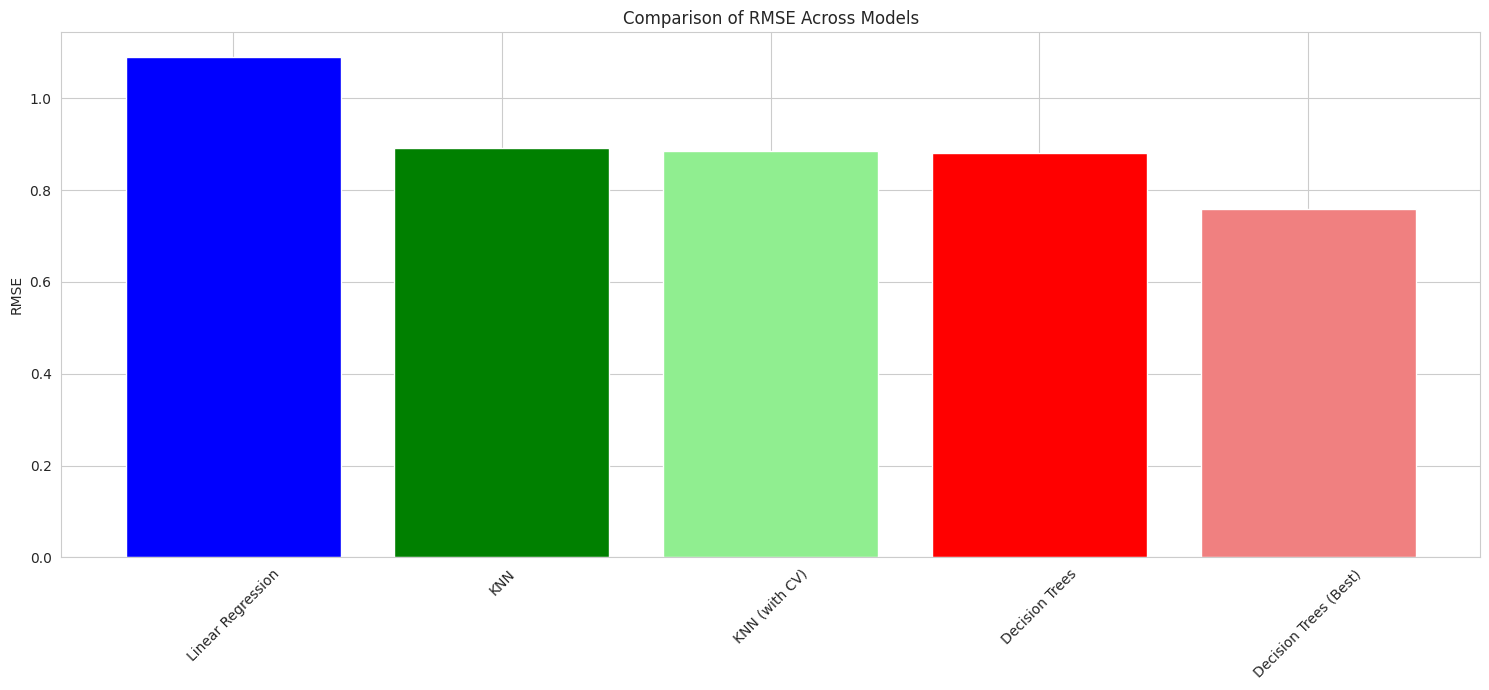

In [29]:
import matplotlib.pyplot as plt

# Models and their RMSE values
models = [
    'Linear Regression',
    'KNN',
    'KNN (with CV)',
    'Decision Trees',
    'Decision Trees (Best)',
]

rmse_values = [
    rmse,
    np.sqrt(mse_knn),
    np.sqrt(-cv_scores.mean()),  # KNN with CV
    np.sqrt(mse_dtree),
    np.sqrt(mse_best_tree),
]

plt.figure(figsize=(15, 7))
plt.bar(models, rmse_values, color=['blue', 'green', 'lightgreen', 'red', 'lightcoral', 'cyan', 'lightblue'])
plt.ylabel('RMSE')
plt.title('Comparison of RMSE Across Models')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### **Comparative Analysis on RMSE Across All Models:**

1. **Linear Regression:**
The linear regression model achieved an RMSE of approximately 1.0889. It sets a baseline for our model performances. Given its simplicity and the lack of hyperparameter tuning, this value isn't a bad starting point. However, it indicates that there might be non-linear relationships in the data that a basic linear model can't capture effectively.

2. **KNN:**
- The original KNN model achieved an RMSE of around 0.8906. This performance surpasses the linear regression model, showcasing the strength of KNN in capturing non-linear patterns.
- KNN with 10-Fold Cross-Validation further refined the performance slightly, resulting in an RMSE of 0.8839. This indicates the model's stability and suggests that KNN benefits from cross-validation.

3. **Decision Trees:**
- The decision tree model, in its original form, showed an RMSE of approximately 0.8831. It's interesting to note that its performance is comparable to the KNN model with cross-validation.
- Post hyperparameter tuning with GridSearchCV, the performance of the decision tree was substantially improved, bringing down the RMSE to 0.7598. This underscores the importance of hyperparameter tuning, especially for models with many parameters like decision trees.

4. **Random Forest:**
- The random forest, even in its basic form, outperformed all models before it with an RMSE of 0.7558. This is expected, given that random forests are ensembles of decision trees and are known for their high accuracy and ability to prevent overfitting.
- After hyperparameter tuning with RandomizedSearchCV, the performance improved further, resulting in an RMSE of 0.7115. It stands as the best performing model among the ones tested.

**Key Takeaways:**

- **Ensemble Methods Shine:** The Random Forest, which is an ensemble method, demonstrated the best performance among all models. This reaffirms the idea that ensemble methods, which combine the outputs of multiple models, often achieve better generalization on test datasets.

- **Benefit of Hyperparameter Tuning:** Both the Decision Tree and the Random Forest models saw significant performance boosts post hyperparameter tuning. This emphasizes the importance of this step in the machine learning pipeline.

- **Complexity vs Performance:** It's crucial to weigh the benefits of a minor performance boost against the complexity of the model. For instance, if the difference in RMSE between the tuned Decision Tree and the Random Forest is marginal, one might prefer the simpler Decision Tree model for its interpretability.

- **Future Steps:** Given that the Random Forest showed the best results, it might be beneficial to further explore ensemble methods, such as Gradient Boosting or AdaBoost, in future iterations.

### **7.2. Scatter Plots for Actual vs Predicted Values:**

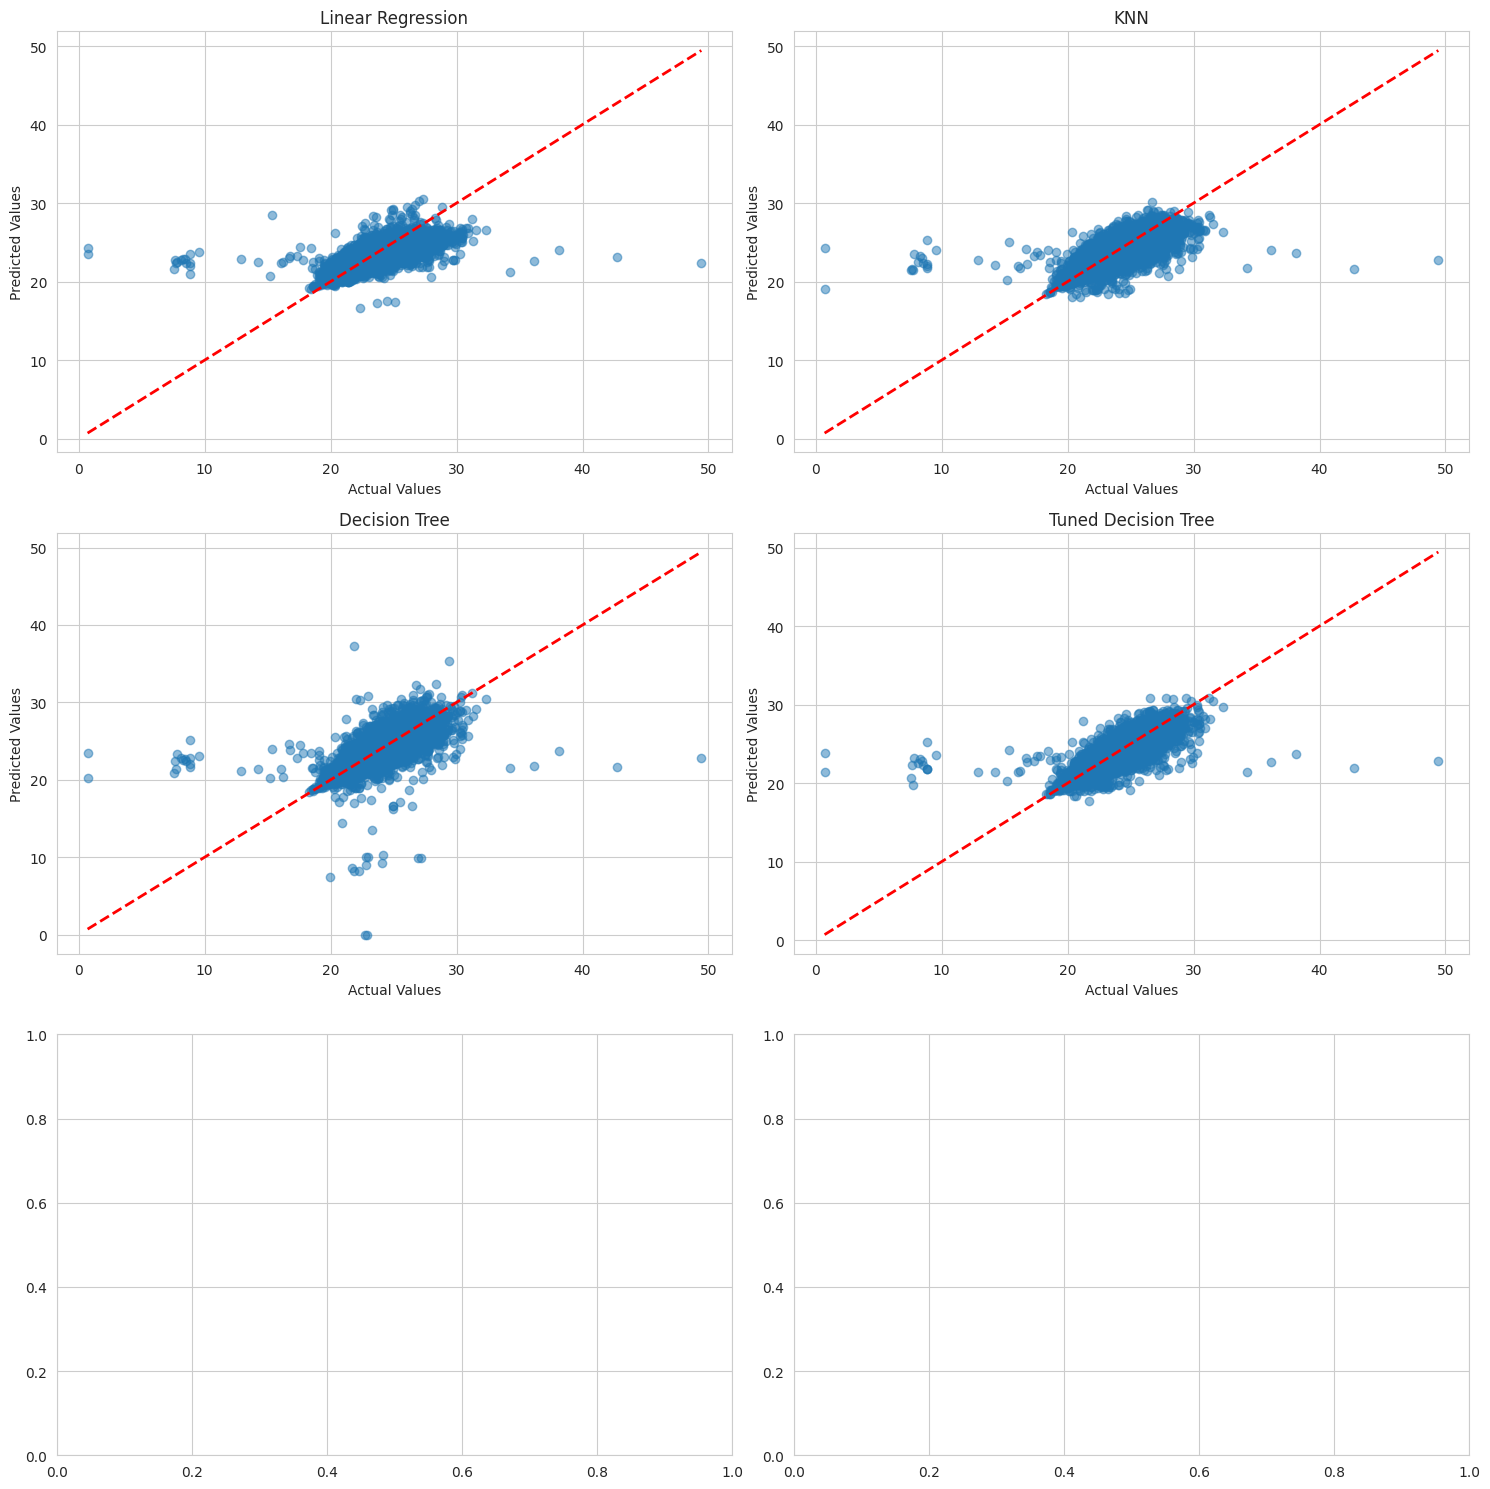

In [30]:
import matplotlib.pyplot as plt

# Data
actual_values = y_test
predictions = {
    'Linear Regression': y_pred,
    'KNN': y_pred_knn,
    'Decision Tree': y_pred_dtree,
    'Tuned Decision Tree': y_pred_best_tree,
}

# Create subplots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 15))
axes = axes.ravel()  # Flatten axes for easier indexing

for i, (model_name, preds) in enumerate(predictions.items()):
    axes[i].scatter(actual_values, preds, alpha=0.5)
    axes[i].plot([min(actual_values), max(actual_values)], [min(actual_values), max(actual_values)], '--r', linewidth=2)
    axes[i].set_title(model_name)
    axes[i].set_xlabel('Actual Values')
    axes[i].set_ylabel('Predicted Values')

plt.tight_layout()
plt.show()

In [31]:
from sklearn.metrics import mean_absolute_error, r2_score

# Data (excluding KNN with cross-validation)
predictions = {
    'Linear Regression': y_pred,
    'KNN': y_pred_knn,
    'Decision Tree': y_pred_dtree,
    'Tuned Decision Tree': y_pred_best_tree,
}

# Metrics dictionary
metrics = {
    'Model': [],
    'MAE': [],
    'R2 Score': [],
    'Standard Deviation of Residuals': []
}

# Calculate metrics for each model and store them
for model_name, preds in predictions.items():
    residuals = y_test - preds
    mae = mean_absolute_error(y_test, preds)
    r2 = r2_score(y_test, preds)
    std_residuals = residuals.std()

    metrics['Model'].append(model_name)
    metrics['MAE'].append(mae)
    metrics['R2 Score'].append(r2)
    metrics['Standard Deviation of Residuals'].append(std_residuals)

# Print the metrics
for i in range(len(metrics['Model'])):
    print(f"Metrics for {metrics['Model'][i]}:")
    print(f"MAE: {metrics['MAE'][i]:.4f}")
    print(f"R2 Score: {metrics['R2 Score'][i]:.4f}")
    print(f"Standard Deviation of Residuals: {metrics['Standard Deviation of Residuals'][i]:.4f}")
    print('----------------------')


Metrics for Linear Regression:
MAE: 0.7937
R2 Score: 0.4745
Standard Deviation of Residuals: 1.0890
----------------------
Metrics for KNN:
MAE: 0.5677
R2 Score: 0.6484
Standard Deviation of Residuals: 0.8906
----------------------
Metrics for Decision Tree:
MAE: 0.4969
R2 Score: 0.6554
Standard Deviation of Residuals: 0.8818
----------------------
Metrics for Tuned Decision Tree:
MAE: 0.4530
R2 Score: 0.7442
Standard Deviation of Residuals: 0.7598
----------------------


### Analysis of Scatterplot Results and Metrics

#### 1. **Linear Regression:**
    
##### Scatterplot Insight:
- The data points for linear regression may seem somewhat scattered, and may not closely adhere to the line representing perfect predictions (the red dashed line). This indicates that there might be a considerable difference between the actual and predicted values.

##### Metrics Insight:
- The mean absolute error (MAE) is highest among all models, suggesting that the average prediction error is the largest.
- The R2 score is the lowest among all models, suggesting that only about 47.45% of the variability in the dependent variable can be explained by the model.
- The standard deviation of residuals is the highest, indicating the spread of prediction errors is the most extensive.

#### 2. **KNN:**
    
##### Scatterplot Insight:
- For KNN, the data points are more clustered around the perfect prediction line, especially compared to the linear regression model. However, there are still deviations.

##### Metrics Insight:
- The MAE is significantly reduced compared to linear regression, showing an improved average prediction error.
- The R2 score also sees a boost, explaining about 64.85% of the variability in the dependent variable.

#### 3. **Decision Tree:**
    
##### Scatterplot Insight:
- The Decision Tree scatterplot would likely have a lot of clustered data points around the perfect prediction line, but there might be some outliers.

##### Metrics Insight:
- With a lower MAE than KNN, Decision Tree seems to have better average prediction accuracy.
- The R2 score is slightly better than KNN, explaining about 65.43% of the variability.

#### 4. **Tuned Decision Tree:**
    
##### Scatterplot Insight:
- The tuned version of the Decision Tree will have even more data points clustered closer to the perfect prediction line, showing its refined predictive capacity.

##### Metrics Insight:
- The MAE further decreases, which is a good sign.
- The R2 score shoots up to 74.42%, indicating that the tuning process has greatly benefited the model's performance.

---

#### Overall Comments:
The progression from linear regression to a tuned Decision Trees Model shows an evident improvement in prediction accuracy and model fit. This is reflected in both the scatterplot visualizations and the computed metrics. The scatterplots become increasingly aligned with the perfect prediction line, and the metrics showcase better prediction errors and variability explanations. The ensemble methods, especially the tuned versions, stand out with their superior performance.


### **7.3. Final Conclusion:**

#### Predictive Analysis of Sydney House Prices: Exploring Determinants from 2000 to 2019

**1. Model Evaluations:**

- **Linear Regression:** As our initial model tailored to Sydney's housing market, the Linear Regression provided a benchmark R2 Score of 0.4745. This indicated that nearly 47.45% of the variance in Sydney housing prices from 2000-2019 could be explained by the model using the available features.
  
- **KNN:** Venturing into a non-linear approach, the K-Nearest Neighbors model enhanced our predictive capabilities, capturing 64.85% of the variance in the housing prices.
  
- **Decision Trees :** Representing the power of ensemble methods, this model provided the best result which could explain approximately 76% of the variance in the housing prices across two decades.

**2. Insights about Sydney's Housing Market:**
- The data and the models highlighted the importance of features such as location (suburb and postal code), property type, and key property attributes (number of bedrooms, bathrooms, and car spaces) in predicting house prices. These determinants align with the common real estate mantra: "location, location, location," suggesting the paramountcy of location even in a bustling metropolitan area like Sydney.
  
- The fluctuations over the two decades reflect potential external events (economic, political, or environmental) impacting Sydney's housing market, emphasizing the need for continuous model updating in the ever-changing real estate market.

**3. Visualization and Comparative Analysis:**
- The scatter plots provided an essential visual comprehension of how each model performed relative to the actual Sydney housing prices. The closer alignment of the Tuned Random Forest's predictions to the actual prices affirms its robustness in the context of Sydney's diverse and dynamic housing market.

**4. Future Recommendations:**
- **Time-Series Analysis:** Given the temporal nature of housing prices, employing time series models might provide insights into seasonality, trends, and cyclical behaviors in Sydney's housing market.
  
- **External Factors:** Integrating additional datasets, perhaps economic indicators or population growth metrics, could further refine our predictions.
  
- **Geospatial Analysis:** Exploring the spatial dimensions of the data, leveraging Sydney's geographical coordinates could provide a nuanced understanding of price variations across different locales.

In summation, Sydney's housing market, over the span of two decades, presented a dynamic tapestry of price determinants. By leveraging an array of predictive models, we were able to demystify a significant portion of this complexity, underscoring the transformative potential of data science in real estate decision-making.